# 1 importattion es librairies

In [3]:
import numpy as np
import pandas as pd

# 2 chargement de data 

In [8]:
data = pd.read_csv('data/studentscores.csv')

In [9]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# 3 analyse de data

In [10]:
# pour veifier si il y a es valeurs manquantes
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [84]:
# pour verifier la somme de valeur manquantes
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [85]:
#pour donner les information générales sur les data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [86]:
# pour verifier la valeur max d'une colonne (ici il s'agit de la colonne "Hours")
data['Hours'].max()

np.float64(9.2)

In [16]:
# pour verifier la valeur min d'une colonne (ici il s'agit de la colonne "Hours")
data['Hours'].min()

np.float64(1.1)

In [17]:
print(data['Hours'].max())

9.2


In [19]:
print("le scrore maximal est de :",data['Scores'].max())

le scrore maximal est de : 95


In [20]:
print("le scrore minimal est de :",data['Scores'].min())

le scrore minimal est de : 17


# 4 division des data 

In [22]:
data.head(4)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75


# variable dependantes et indep

In [34]:
x = data.iloc[ : , : -1].values
y = data.iloc[ : ,  -1].values

In [24]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [31]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

# 4.1 separation des data

In [28]:
from sklearn.model_selection import train_test_split

In [73]:
x_train, x_test, y_train, y_test =  train_test_split(x, y,  test_size = 0.25, random_state = 0)

In [38]:
print("x_train shape :", x_train.shape) 
print("x_test shape :", x_test.shape) 
print("y_train shape :", y_train.shape) 
print("y_test shape :", y_test.shape) 

x_train shape : (18, 1)
x_test shape : (7, 1)
y_train shape : (18,)
y_test shape : (7,)


# 5 construire le model model

In [ ]:
#  importation de l'algorithme e regression lineaire

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
model_linear =  LinearRegression()

In [ ]:
# entrainement du model

In [41]:
model_linear.fit(x_train, y_train)

LinearRegression()

In [ ]:
#  faire des predictions 

In [44]:
y_score_predits = model_linear.predict(x_test)

In [45]:
y_score_predits

array([90.34862057, 79.20125828, 11.303688  , 75.147672  , 33.59841257,
       86.29503428, 48.79936114])

In [46]:
y_test

array([95, 86, 17, 69, 42, 75, 54])

In [47]:
resultats =  pd.DataFrame(y_test, y_score_predits)

In [48]:
resultats

,0
90.348621,95
79.201258,86
11.303688,17
75.147672,69
33.598413,42
86.295034,75
48.799361,54


In [51]:
# evaluation du modele
from sklearn.metrics import mean_squared_error, r2_score

In [74]:
print(" le MSE de la regresion lineaire:", mean_squared_error(y_test, y_score_predits))

 le MSE de la regresion lineaire: 2441.9879299545914


In [75]:
print(" le R2-score de la regresion lineaire:", r2_score(y_test, y_score_predits))

 le R2-score de la regresion lineaire: -6.594402676299503


# visualisation des resultats 

In [58]:
import matplotlib.pyplot  as plt

<function matplotlib.pyplot.show(close=None, block=None)>

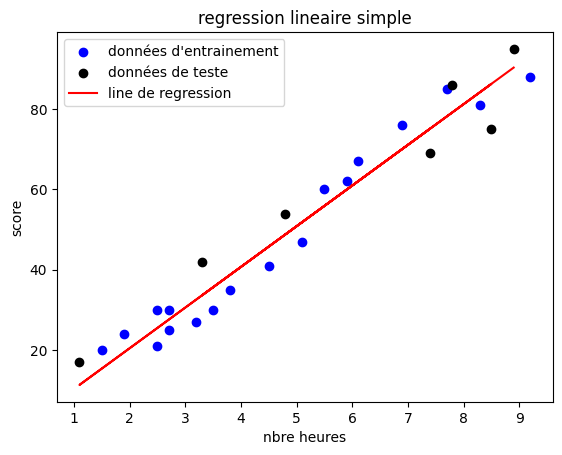

In [72]:
plt.scatter(x_train, y_train, color= 'blue', label= "données d'entrainement")
plt.scatter(x_test, y_test, color= 'black', label= "données de teste")

plt.plot(x_test, y_score_predits, color='red', label= 'line de regression')

plt.xlabel('nbre heures')
plt.ylabel('score')
plt.title('regression lineaire simple')
plt.legend()


plt.show

# prediction simple

In [80]:
dif =  y_test-y_score_predits

In [83]:

resultats = pd.DataFrame({'y-score-reel':y_test, 'y-score predits': y_score_predits, 'difference': dif})
resultats

,y-score-reel,y-score predits,difference
0,20,90.348621,-70.348621
1,27,79.201258,-52.201258
2,69,11.303688,57.696312
3,30,75.147672,-45.147672
4,62,33.598413,28.401587
5,35,86.295034,-51.295034
6,24,48.799361,-24.799361


In [78]:
print (model_linear.predict([[10]]))

[101.49598285]
